In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [2]:
# Get path of all files
path_list = glob.glob("data/*/*.csv")

# Show first 10 items
path_list[:10]

['data/01-01-2016/ana.csv',
 'data/01-01-2016/ant.csv',
 'data/01-01-2016/asabs.csv',
 'data/01-01-2016/asi.csv',
 'data/01-01-2016/assem.csv',
 'data/01-01-2016/ast.csv',
 'data/01-01-2016/bch.csv',
 'data/01-01-2016/ceres.csv',
 'data/01-01-2016/chm.csv',
 'data/01-01-2016/cine.csv']

In [3]:
# How many CSV files are there?
len(path_list)

17906

In [4]:
# What's the first item in the list?
path_list[0]

'data/01-01-2016/ana.csv'

In [5]:
# Read the first item to show output structure
temp_df = pd.read_csv(path_list[0])
temp_df.head()

,Course,Section Code,Title(subtitle),Meeting Section,Wait List,Time,Location,Instructor,Enrolment Indicator,Enrolment Controls,Information Updated,Enrolment Caps,Enrolment #,WaitList #
0,ANA300Y1,Y,Human Anat Histol,L0101,Y,MT9,MS 2158,B. Ballyk,P,See Details,NaN,400.0,315.0,0.0
1,NaN,NaN,NaN,NaN,NaN,F10-12,MS 2158,B. Ballyk,NaN,NaN,NaN,NaN,NaN,NaN
2,ANA301H1,S,Human Embryology,L0101,Y,MF1-3,MS 2158,M. Bidmos,NaN,NaN,NaN,500.0,186.0,0.0
3,ANA400H1,S,Anatomy Dissections,L0101,N,TR1-3,NaN,M. Bidmos,E,NaN,NaN,NaN,20.0,0.0
4,ANA498Y1,Y,Research Project,L0101,N,TBA,NaN,H. Sun,E,NaN,NaN,NaN,24.0,0.0


In [6]:
# Lets merge all the CSV files into one.
# Since there is no way to distinguish the data of one course for different days, a new column must be added that
# displays the date that the data was fetch. This information is available through the path of the file.

In [7]:
# EXAMPLE:

# Add a date column to temp_df using the path.

# Start by getting the path
temp_path = path_list[0]
temp_path

'data/01-01-2016/ana.csv'

In [8]:
# Split using slash and get middle item (i.e. the date)
temp_date = temp_path.split('/')[1]
temp_date

'01-01-2016'

In [9]:
# Add the date to the data path
temp_df['date'] = temp_date
temp_df.head()

,Course,Section Code,Title(subtitle),Meeting Section,Wait List,Time,Location,Instructor,Enrolment Indicator,Enrolment Controls,Information Updated,Enrolment Caps,Enrolment #,WaitList #,date
0,ANA300Y1,Y,Human Anat Histol,L0101,Y,MT9,MS 2158,B. Ballyk,P,See Details,NaN,400.0,315.0,0.0,01-01-2016
1,NaN,NaN,NaN,NaN,NaN,F10-12,MS 2158,B. Ballyk,NaN,NaN,NaN,NaN,NaN,NaN,01-01-2016
2,ANA301H1,S,Human Embryology,L0101,Y,MF1-3,MS 2158,M. Bidmos,NaN,NaN,NaN,500.0,186.0,0.0,01-01-2016
3,ANA400H1,S,Anatomy Dissections,L0101,N,TR1-3,NaN,M. Bidmos,E,NaN,NaN,NaN,20.0,0.0,01-01-2016
4,ANA498Y1,Y,Research Project,L0101,N,TBA,NaN,H. Sun,E,NaN,NaN,NaN,24.0,0.0,01-01-2016


In [10]:
# Create an empty DataFrame (table) and use the columns from the temp DataFrame as a basis for the DataFrame
combined_df = pd.DataFrame(columns=temp_df.columns)

# Empty table (only headers)
combined_df

,Course,Section Code,Title(subtitle),Meeting Section,Wait List,Time,Location,Instructor,Enrolment Indicator,Enrolment Controls,Information Updated,Enrolment Caps,Enrolment #,WaitList #,date


In [12]:
# Go through all the CSV files, add the date column and combine all into one big table.

# THIS WILL TAKE A COUPLE MINUTES. IT IS GOING THROUGH OVER 17,000 CSV files.
i = 0
df_list = []
for path in path_list:
    # Read the CSV file
    temp_df = pd.read_csv(path, header=0, index_col=None)

    # Add the date column to the DataFrame
    temp_df['date'] = path.split('/')[1]
    
    df_list.append(temp_df)
    

combined_df = pd.concat(df_list)
combined_df.to_csv("combined_data2.csv", index=False)

In [14]:
# Table might have a couple extra columns due to slight column name differences between tables. We only care about
# the enrolment numbers, and the column names were consistent for all tables.
combined_df.head()

,Course,Enrolment Controls,Enrolment Indicator,Enrolment Caps,Enrolment #,Enrolment Caps,Enrolment Controls,Enrolment Indicator,Enrolment Caps,Information Updated,...,Section Code,Section Code,Time,Title(subtitle),Wait List,Wait List #,Wait List,WaitList,WaitList #,date
0,ANA300Y1,NaN,NaN,NaN,315.0,400.0,See Details,P,NaN,NaN,...,NaN,Y,MT9,Human Anat Histol,NaN,NaN,Y,NaN,0.0,01-01-2016
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,F10-12,NaN,NaN,NaN,NaN,NaN,NaN,01-01-2016
2,ANA301H1,NaN,NaN,NaN,186.0,500.0,NaN,NaN,NaN,NaN,...,NaN,S,MF1-3,Human Embryology,NaN,NaN,Y,NaN,0.0,01-01-2016
3,ANA400H1,NaN,NaN,NaN,20.0,NaN,NaN,E,NaN,NaN,...,NaN,S,TR1-3,Anatomy Dissections,NaN,NaN,N,NaN,0.0,01-01-2016
4,ANA498Y1,NaN,NaN,NaN,24.0,NaN,NaN,E,NaN,NaN,...,NaN,Y,TBA,Research Project,NaN,NaN,N,NaN,0.0,01-01-2016


In [15]:
# Total number of rows
len(combined_df)

1543986

In [58]:
# Remove unneeded columns. Since there are a lot of columns, it's easier to simply select the columns that we need
# Creating a new DataFrame since it took a couple minutes to generate the previous one.

needed_cols = ['Course', 'Enrolment #', 'Enrolment Caps', 'WaitList #', 'date']
new_df = combined_df[needed_cols]
new_df.head()

,Course,Enrolment #,Enrolment Caps,WaitList #,date
0,ANA300Y1,315.0,400.0,0.0,01-01-2016
1,NaN,NaN,NaN,NaN,01-01-2016
2,ANA301H1,186.0,500.0,0.0,01-01-2016
3,ANA400H1,20.0,NaN,0.0,01-01-2016
4,ANA498Y1,24.0,NaN,0.0,01-01-2016


In [59]:
# Some rows will have all NaN values (With exception of date column). This is because the row provided information
# about a course that was in a column that was removed. These rows are no longer needed.

# Remove all rows that are Nan in every column (with exception of date col)
new_df = new_df.dropna(subset=new_df.columns.values[:-1], how='all')

# rows that are all Nan (with excption of date) have been removed
# Some courses don't have enrolment Caps. So it is fine to have them as Nan.
new_df.head(10)

,Course,Enrolment #,Enrolment Caps,WaitList #,date
0,ANA300Y1,315.0,400.0,0.0,01-01-2016
2,ANA301H1,186.0,500.0,0.0,01-01-2016
3,ANA400H1,20.0,NaN,0.0,01-01-2016
4,ANA498Y1,24.0,NaN,0.0,01-01-2016
0,ANT100Y1,57.0,70.0,0.0,01-01-2016
1,NaN,1169.0,1380.0,0.0,01-01-2016
2,ANT200Y1,190.0,350.0,0.0,01-01-2016
4,NaN,18.0,30.0,0.0,01-01-2016
5,NaN,17.0,30.0,0.0,01-01-2016
6,NaN,20.0,30.0,0.0,01-01-2016


In [60]:
# Total number of rows
len(new_df)

1347163

In [61]:
# Some courses have NaN values. This is because that row still corresponds to the first non-NaN value above it.
# The row is supposed to represent a different secetion of the same course.

# Lets replace all the NaN values in the Course column with the first non-NaN value above it to get a correct
# representation of the data.
new_df['Course'].fillna(method='ffill', inplace=True)

new_df.head(10)

,Course,Enrolment #,Enrolment Caps,WaitList #,date
0,ANA300Y1,315.0,400.0,0.0,01-01-2016
2,ANA301H1,186.0,500.0,0.0,01-01-2016
3,ANA400H1,20.0,NaN,0.0,01-01-2016
4,ANA498Y1,24.0,NaN,0.0,01-01-2016
0,ANT100Y1,57.0,70.0,0.0,01-01-2016
1,ANT100Y1,1169.0,1380.0,0.0,01-01-2016
2,ANT200Y1,190.0,350.0,0.0,01-01-2016
4,ANT200Y1,18.0,30.0,0.0,01-01-2016
5,ANT200Y1,17.0,30.0,0.0,01-01-2016
6,ANT200Y1,20.0,30.0,0.0,01-01-2016


In [92]:
# Lets now group the rows by course so there is only one row per course. All sections of the courses get grouped
# together.

grouped_df = new_df.groupby(['Course', 'date']).sum()
grouped_df.reset_index(level=[0,1], inplace=True)

grouped_df.head(10)

,Course,date,Enrolment #,Enrolment Caps,WaitList #
0,ABP100Y1,01-01-2016,24.0,50.0,0.0
1,ABP100Y1,01-02-2016,23.0,50.0,NaN
2,ABP100Y1,01-03-2016,23.0,50.0,NaN
3,ABP100Y1,01-04-2016,20.0,50.0,NaN
4,ABP100Y1,01-05-2016,20.0,50.0,NaN
5,ABP100Y1,01-10-2015,23.0,50.0,0.0
6,ABP100Y1,01-11-2015,24.0,50.0,0.0
7,ABP100Y1,01-12-2015,24.0,50.0,0.0
8,ABP100Y1,02-01-2016,24.0,50.0,0.0
9,ABP100Y1,02-02-2016,23.0,50.0,NaN


In [93]:
# Total number of rows
len(grouped_df)

660426

In [97]:
abc = grouped_df.loc[grouped_df['Course'] == 'CSC108H1']
abc.head(10)

,Course,date,Enrolment #,Enrolment Caps,WaitList #
95982,CSC108H1,01-01-2016,1756.0,1890.0,519.0
95983,CSC108H1,01-02-2016,1755.0,1890.0,NaN
95984,CSC108H1,01-03-2016,1755.0,1890.0,NaN
95985,CSC108H1,01-04-2016,1617.0,1890.0,NaN
95986,CSC108H1,01-05-2016,1617.0,1890.0,NaN
95987,CSC108H1,01-10-2015,1879.0,1880.0,203.0
95988,CSC108H1,01-11-2015,1822.0,1890.0,319.0
95989,CSC108H1,01-12-2015,1771.0,1890.0,467.0
95990,CSC108H1,02-01-2016,1756.0,1890.0,519.0
95991,CSC108H1,02-02-2016,1755.0,1890.0,NaN


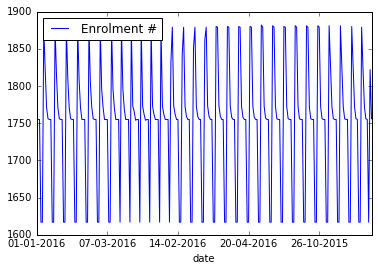

In [114]:
abc[['Enrolment #', 'date']].plot(x='date', y='Enrolment #', kind='line')
# plt.figure()
plt.show()

In [107]:
abc = abc[abc.date != '08-05-2016']

